In [1]:
import tensorflow as tf

In [2]:
!wget --no-check-certificate \
  ftp://cs.stanford.edu/cs/cvgl/Stanford_Online_Products.zip \
  -O /tmp/Stanford_Online_Products.zip

--2021-09-30 05:05:14--  ftp://cs.stanford.edu/cs/cvgl/Stanford_Online_Products.zip
           => ‘/tmp/Stanford_Online_Products.zip’
Resolving cs.stanford.edu (cs.stanford.edu)... 171.64.64.64
Connecting to cs.stanford.edu (cs.stanford.edu)|171.64.64.64|:21... connected.
Logging in as anonymous ... Logged in!
==> SYST ... done.    ==> PWD ... done.
==> TYPE I ... done.  ==> CWD (1) /cs/cvgl ... done.
==> SIZE Stanford_Online_Products.zip ... 3083860082
==> PASV ... done.    ==> RETR Stanford_Online_Products.zip ... done.
Length: 3083860082 (2.9G) (unauthoritative)

Stanford_Online_Pro 100%[===================>]   2.87G  33.6MB/s    in 72s     

2021-09-30 05:06:26 (41.1 MB/s) - ‘/tmp/Stanford_Online_Products.zip’ saved [3083860082]



In [3]:
import zipfile, os

file_zip = '/tmp/Stanford_Online_Products.zip'
zip_ref = zipfile.ZipFile(file_zip, 'r')
zip_ref.extractall('/content')
zip_ref.close()

base_dir = '/content/Stanford_Online_Products'

In [4]:
os.listdir(base_dir)

['Ebay_final.txt',
 'kettle_final.txt',
 'table_final',
 'Ebay_info.txt',
 'Ebay_train.txt',
 'toaster_final.txt',
 'sofa_final.txt',
 'mug_final',
 'table_final.txt',
 'bicycle_final.txt',
 'chair_final',
 'Ebay_test.txt',
 'README',
 'LICENSE',
 'bicycle_final',
 'fan_final',
 'chair_final.txt',
 'mug_final.txt',
 'coffee_maker_final.txt',
 'cabinet_final.txt',
 'lamp_final',
 'toaster_final',
 'sofa_final',
 'lamp_final.txt',
 'coffee_maker_final',
 'kettle_final',
 'cabinet_final',
 'stapler_final',
 'fan_final.txt',
 'stapler_final.txt']

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
                    rescale = 1./225,
                    rotation_range = 20,
                    horizontal_flip = True,
                    shear_range = 0.2,
                    fill_mode = 'nearest',
                    validation_split = 0.2
)

In [6]:
# deklarasi variabel global ukuran gambar
image_size = (224, 224)

train_generator = train_datagen.flow_from_directory(
        base_dir,
        target_size = image_size,
        classes=['lamp_final', 'mug_final', 'sofa_final'],
        batch_size = 128,
        class_mode = 'categorical',
        subset='training'
)
 
val_generator = train_datagen.flow_from_directory(
        base_dir,
        target_size = image_size,
        classes=['lamp_final', 'mug_final', 'sofa_final'],
        batch_size = 64,
        class_mode = 'categorical',
        subset='validation'
)

Found 26870 images belonging to 3 classes.
Found 6717 images belonging to 3 classes.


In [7]:
# membuat class callback untuk stopping
class myCallback(tf.keras.callbacks.Callback):
   def on_epoch_end(self, epoch, logs={}):
      if(logs.get('accuracy') >= 0.85 and logs.get('val_accuracy') >= 0.85):
          print("\nAkurasi telah mencapai >=85%!")
          self.model.stop_training = True

callbacks = myCallback()

In [8]:
model = tf.keras.models.Sequential()


model.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu', input_shape = (224,224,3)))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2))) 
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Conv2D(filters =96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Conv2D(filters = 96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(512))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Dense(3, activation = "softmax"))

In [9]:
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = tf.optimizers.Adam(),
    metrics = ['accuracy']
)

In [10]:
# deklarasi variabel global epoch
epochs = 200

# membuat objek callback untuk early stopping dan reduksi learning rate
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', patience=15, verbose=2, min_lr=0.00001)

# latih model dengan model.fit
history = model.fit(train_generator,
                    epochs = epochs, 
                    validation_data = val_generator,
                    verbose = 2, 
                    steps_per_epoch = 25,
                    callbacks=[callbacks, reduce_lr],
                    validation_steps = 25)


Epoch 1/200
25/25 - 102s - loss: 1.5938 - accuracy: 0.3734 - val_loss: 1.0730 - val_accuracy: 0.3781
Epoch 2/200
25/25 - 67s - loss: 1.0674 - accuracy: 0.3947 - val_loss: 1.0444 - val_accuracy: 0.4206
Epoch 3/200
25/25 - 65s - loss: 1.0254 - accuracy: 0.4172 - val_loss: 1.0432 - val_accuracy: 0.3719
Epoch 4/200
25/25 - 64s - loss: 1.0002 - accuracy: 0.4419 - val_loss: 1.0088 - val_accuracy: 0.5150
Epoch 5/200
25/25 - 64s - loss: 0.9880 - accuracy: 0.4837 - val_loss: 0.9914 - val_accuracy: 0.5531
Epoch 6/200
25/25 - 64s - loss: 0.9676 - accuracy: 0.5100 - val_loss: 0.9591 - val_accuracy: 0.5206
Epoch 7/200
25/25 - 65s - loss: 0.9502 - accuracy: 0.5309 - val_loss: 0.8939 - val_accuracy: 0.5625
Epoch 8/200
25/25 - 65s - loss: 0.8662 - accuracy: 0.5881 - val_loss: 0.8709 - val_accuracy: 0.6231
Epoch 9/200
25/25 - 65s - loss: 0.8640 - accuracy: 0.6041 - val_loss: 0.7784 - val_accuracy: 0.6925
Epoch 10/200
25/25 - 64s - loss: 0.7935 - accuracy: 0.6591 - val_loss: 0.8312 - val_accuracy: 0.623

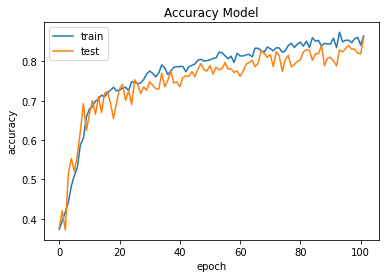

In [11]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

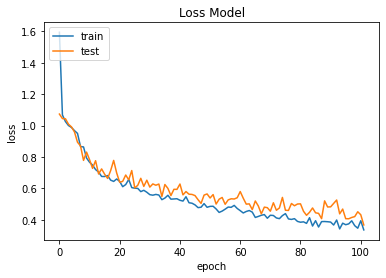

In [12]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [13]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

INFO:tensorflow:Assets written to: /tmp/tmpiwj2b0sz/assets


In [14]:
with tf.io.gfile.GFile('model.tflite', 'wb') as f:
  f.write(tflite_model)